<a href="https://colab.research.google.com/github/mahoryu/LabsPT13-Resfeber-A-DS/blob/main/notebooks/airB%26B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Exploration

In [1]:
import pandas as pd
# reading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Lambda-School-Labs/LabsPT13-Resfeber-A-DS/main/notebooks/Data/AB_US_2020.csv')
# first five rows of the dataset
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [2]:
# shape of the dataset(rows,columns)
df.shape

(226030, 17)

In [3]:
# To find the data types of all the columns
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
city                               object
dtype: object

In [4]:
# To find null or missing values
df.isnull().sum()

id                                     0
name                                  28
host_id                                0
host_name                             33
neighbourhood_group               115845
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        48602
reviews_per_month                  48602
calculated_host_listings_count         0
availability_365                       0
city                                   0
dtype: int64

In [5]:
# occurrences of different room_type in a column
df['room_type'].value_counts()

Entire home/apt    154173
Private room        65887
Shared room          4029
Hotel room           1941
Name: room_type, dtype: int64

In [6]:
# occurrences of different cities in a column
df['city'].value_counts()

New York City        45756
Los Angeles          31536
Hawaii               22434
San Diego            12404
Broward County       10858
Austin               10436
Clark County          8408
Washington D.C.       7350
San Clara Country     7091
San Francisco         7053
Seattle               6575
Twin Cities MSA       6470
New Orleans           6408
Chicago               6397
Nashville             6139
Portland              4281
Denver                4200
Rhode Island          3884
Boston                3339
Oakland               3204
San Mateo County      2855
Jersey City           2488
Asheville             2074
Santa Cruz County     1571
Columbus              1409
Cambridge             1029
Salem                  202
Pacific Grove          179
Name: city, dtype: int64

In [7]:
# occurrences of different neighbourhood
df['neighbourhood'].value_counts()

Unincorporated Areas         8020
Hollywood                    4384
Primary Urban Center         4179
Hennepin                     3935
Kihei-Makena                 3894
                             ... 
Hawaiian Gardens                1
Tottenville                     1
Viavant - Venetian Isles        1
Northwest Antelope Valley       1
Elmhurst Park                   1
Name: neighbourhood, Length: 1450, dtype: int64

In [8]:
# first 5 values of neighbourhood column
df['neighbourhood'].head()

0    28804
1    28801
2    28801
3    28806
4    28801
Name: neighbourhood, dtype: object

In [9]:
# last 5 values of neighbourhood column
df['neighbourhood'].tail()

226025    Downtown, Chinatown, Penn Quarters, Mount Vern...
226026                        Brookland, Brentwood, Langdon
226027                                   Shaw, Logan Circle
226028       Kalorama Heights, Adams Morgan, Lanier Heights
226029    Edgewood, Bloomingdale, Truxton Circle, Eckington
Name: neighbourhood, dtype: object

In [10]:
# occurrences of different neighbourhood_group
df['neighbourhood_group'].value_counts()

Manhattan               20236
Brooklyn                18263
City of Los Angeles     17544
Other Cities            11463
Maui                     7897
Honolulu                 6313
Queens                   5746
Hawaii                   4977
Kauai                    3247
Unincorporated Areas     2529
Newport                  1412
Other neighborhoods      1253
Washington               1201
Bronx                    1185
Providence               1056
Downtown                 1043
Capitol Hill              682
Central Area              572
Queen Anne                459
West Seattle              378
Ballard                   369
Rainier Valley            357
Staten Island             326
Cascade                   268
Beacon Hill               252
University District       238
Delridge                  201
Northgate                 150
Magnolia                  132
Lake City                 118
Kent                      108
Bristol                   107
Seward Park                69
Interbay  

In [11]:
pd.options.display.max_rows = 20
df["minimum_nights"].value_counts()

1      60427
2      54748
30     33532
3      30931
4       9513
       ...  
49         1
345        1
229        1
102        1
456        1
Name: minimum_nights, Length: 169, dtype: int64

### Data Cleaning

In [12]:
# dropped the irrelevant columns and created new dataframe
new_df = df.drop(['host_name','host_id','neighbourhood_group','neighbourhood','last_review'], axis=1)

In [13]:
# first 5 rows of new dataset
new_df.head()

,id,name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,35.65146,-82.62792,Private room,60,1,138,1.14,1,0,Asheville
1,80905,French Chic Loft,35.59779,-82.55540,Entire home/apt,470,1,114,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,35.60670,-82.55563,Entire home/apt,75,30,89,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,35.57864,-82.59578,Entire home/apt,90,1,267,2.39,5,0,Asheville
4,160594,Historic Grove Park,35.61442,-82.54127,Private room,125,30,58,0.52,1,0,Asheville


In [14]:
# replacing NaN values for the reviews_per_month column
new_df['reviews_per_month'] = new_df['reviews_per_month'].fillna(0)


In [15]:
# checking again the column if there is any null value but now there is no null vales
new_df['reviews_per_month'].isnull().sum()

0

In [16]:
# check all the null or missing or NaN values
new_df.isnull().sum()

id                                 0
name                              28
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
city                               0
dtype: int64

In [17]:
# To find null values in the name column
new_df[new_df['name'].isnull()].head()


,id,name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
23691,39717529,NaN,26.28332,-80.10731,Entire home/apt,79,2,16,2.23,2,136,Broward County
81872,17108083,NaN,34.17216,-118.11699,Private room,125,2,0,0.00,1,179,Los Angeles
93004,33877948,NaN,34.41328,-118.44301,Private room,40,1,10,0.64,1,129,Los Angeles
119475,1615764,NaN,40.71239,-74.01620,Entire home/apt,400,1000,0,0.00,1,362,New York City
120149,2232600,NaN,40.73215,-73.98821,Entire home/apt,200,1,28,0.37,1,364,New York City


In [18]:
# replacing NaN values with no_name
new_df['name'].fillna('no_name', inplace = True) 

In [19]:
# check for null values again
new_df.isnull().sum()

id                                0
name                              0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
city                              0
dtype: int64

In [20]:
# check the dataset again
new_df.head()

,id,name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,35.65146,-82.62792,Private room,60,1,138,1.14,1,0,Asheville
1,80905,French Chic Loft,35.59779,-82.55540,Entire home/apt,470,1,114,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,35.60670,-82.55563,Entire home/apt,75,30,89,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,35.57864,-82.59578,Entire home/apt,90,1,267,2.39,5,0,Asheville
4,160594,Historic Grove Park,35.61442,-82.54127,Private room,125,30,58,0.52,1,0,Asheville


In [21]:
new_df = new_df.drop(['id','name'],axis=1)
new_df.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
0,35.65146,-82.62792,Private room,60,1,138,1.14,1,0,Asheville
1,35.59779,-82.55540,Entire home/apt,470,1,114,1.03,11,288,Asheville
2,35.60670,-82.55563,Entire home/apt,75,30,89,0.81,2,298,Asheville
3,35.57864,-82.59578,Entire home/apt,90,1,267,2.39,5,0,Asheville
4,35.61442,-82.54127,Private room,125,30,58,0.52,1,0,Asheville


### Random Forest Model

In [22]:
# split the data into a training set and a validation set
from sklearn.model_selection import train_test_split
train, val = train_test_split(new_df, train_size=0.80, test_size=0.20,random_state=42)

# set an X and y for train and val
target = 'price'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]

In [23]:
!pip install category_encoders
import category_encoders as ce
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# train a random forest regressor
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestRegressor(n_estimators=50, criterion="mse", max_depth=3, random_state=42,n_jobs=-1)
)
# fit the data on train and score the data on val
pipeline.fit(X_train,y_train)


     |████████████████████████████████| 81kB 2.6MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['room_type', 'city'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'room_type',
                                          'data_type': dtype('O'),
                                          'mapping': Entire home/apt    1
Private room       2
Shared room        3
Hotel room         4
NaN               -2
dtype: int64},
                                         {'col': 'city',
                                          'data_type': dtype('O'),
                                          'mapping': Hawaii            1
New Orleans       2
Bost...
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=3,
                                       max_features='auto', max_leaf_nodes=None,
  

In [24]:
pred = pipeline.predict(X_val)
print("R2 Score:", r2_score(y_val,pred))
print("Mean Squared Error:", mean_squared_error(y_val,pred))
print("Mean Absolute Error:", mean_absolute_error(y_val,pred))

R2 Score: 0.04684412840538321
Mean Squared Error: 347015.2497850995
Mean Absolute Error: 162.48903188123526


#### Feature Importance

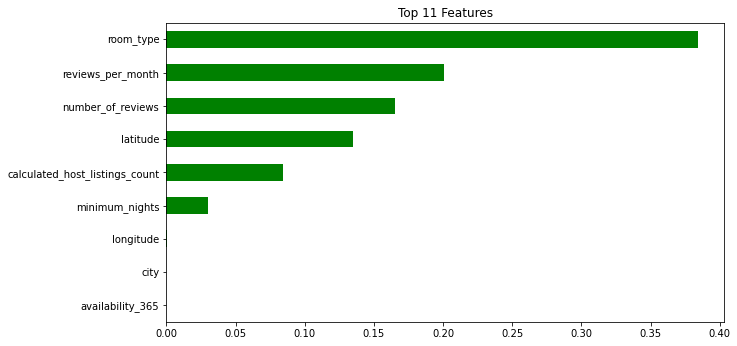

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

n = 11
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} Features')
importances.sort_values()[-n:].plot.barh(color='green');

### XGBoost

In [26]:
from xgboost import XGBRegressor

pipleline_XGB = make_pipeline(
    ce.OrdinalEncoder(),
    XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

pipleline_XGB.fit(X_train,y_train)


[04:03:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['room_type', 'city'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'room_type',
                                          'data_type': dtype('O'),
                                          'mapping': Entire home/apt    1
Private room       2
Shared room        3
Hotel room         4
NaN               -2
dtype: int64},
                                         {'col': 'city',
                                          'data_type': dtype('O'),
                                          'mapping': Hawaii            1
New Orleans       2
Bost...
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                   

In [27]:
pred = pipleline_XGB.predict(X_val)
print("R2 Score:", r2_score(y_val,pred))
print("Mean Squared Error:", mean_squared_error(y_val,pred))
print("Mean Absolute Error:", mean_absolute_error(y_val,pred))

R2 Score: 0.18994175413063896
Mean Squared Error: 294917.728472422
Mean Absolute Error: 147.72654794966843


### Training a Neural Network

In [ ]:
from sklearn.preprocessing import StandardScaler

# encode the data so that we don't have an categorical data
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

# scale the data so the neural network doesn't get stuck on the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Important Hyperparameters
inputs = X_train_scaled.shape[1]
epochs = 75
batch_size = 10

# Create Model
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(inputs,)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1))

# Early Stopping
callback=EarlyStopping(patience=5,verbose=1,min_delta=1)

# Compile Model
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

# Fit Model
results = model.fit(X_train_scaled, y_train, 
            validation_data=(X_val_scaled,y_val), 
            epochs=epochs, 
            batch_size=batch_size,
            callbacks=[callback])

Epoch 1/75
18083/18083 [==============================] - 21s 1ms/step - loss: 136.0158 - mae: 136.0158 - val_loss: 131.9002 - val_mae: 131.9002
Epoch 2/75
18083/18083 [==============================] - 21s 1ms/step - loss: 128.8760 - mae: 128.8760 - val_loss: 131.1290 - val_mae: 131.1290
Epoch 3/75
18083/18083 [==============================] - 21s 1ms/step - loss: 128.2353 - mae: 128.2353 - val_loss: 130.5606 - val_mae: 130.5606
Epoch 4/75
18083/18083 [==============================] - 22s 1ms/step - loss: 127.6265 - mae: 127.6265 - val_loss: 130.0735 - val_mae: 130.0735
Epoch 5/75
18083/18083 [==============================] - 23s 1ms/step - loss: 127.1408 - mae: 127.1408 - val_loss: 129.6036 - val_mae: 129.6036
Epoch 6/75
18083/18083 [==============================] - 21s 1ms/step - loss: 126.7360 - mae: 126.7360 - val_loss: 129.2360 - val_mae: 129.2360
Epoch 7/75
18083/18083 [==============================] - 21s 1ms/step - loss: 126.3998 - mae: 126.3998 - val_loss: 128.8054 - val

KeyboardInterrupt: ignored

#### Hyperparameter Tuning

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV

# Function to create model, required for KerasRegressor
def create_model(lr=0.001):

    # Define Adam optimizer
    opt = Adam(learning_rate=lr)

    # inputs
    inputs = X_train_scaled.shape[1]

    # Create Model
    model = Sequential()
    model.add(Dense(64, activation='sigmoid', input_shape=(inputs,)))
    model.add(Dense(64, activation='sigmoid'))
    model.add(Dense(1))
    
    # Compile Model
    model.compile(optimizer=opt, loss='mae', metrics=['mae'])
    return model

# Create model
model2 = KerasRegressor(build_fn=create_model, verbose=0)

# define the grid search parameters
param_grid = {'lr': [0.01, 0.05, 0.1, 0.25],
              'batch_size': [8, 16],
              'epochs': [7]}

# Create Grid Search
grid = GridSearchCV(estimator=model2, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_train_scaled, y_train)

# Report Results
print(f"Best: {-grid_result.best_score_} using {grid_result.best_params_}")
means = -grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 122.19459838867188 using {'batch_size': 8, 'epochs': 7, 'lr': 0.01}
Means: 122.19459838867188, Stdev: 1.6522169202616936 with: {'batch_size': 8, 'epochs': 7, 'lr': 0.01}
Means: 128.2876968383789, Stdev: 1.4233517234070934 with: {'batch_size': 8, 'epochs': 7, 'lr': 0.05}
Means: 130.25276794433594, Stdev: 1.4270024316948446 with: {'batch_size': 8, 'epochs': 7, 'lr': 0.1}
Means: 145.03925476074218, Stdev: 1.9787988610756149 with: {'batch_size': 8, 'epochs': 7, 'lr': 0.25}
Means: 122.36755065917968, Stdev: 1.7005840046298697 with: {'batch_size': 16, 'epochs': 7, 'lr': 0.01}
Means: 127.41482543945312, Stdev: 1.8335407527648022 with: {'batch_size': 16, 'epochs': 7, 'lr': 0.05}
Means: 130.47513580322266, Stdev: 2.57355448847268 with: {'batch_size': 16, 'epochs': 7, 'lr': 0.1}
Means: 144.88843994140626, Stdev: 1.8624589735961385 with: {'batch_size': 16, 'epochs': 7, 'lr': 0.25}


## Selecting only user input features

In [28]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [30]:
# select only features that the user could be asked about
df_user = df[['latitude','longitude','room_type','minimum_nights','price']]
df_user.head()

,latitude,longitude,room_type,minimum_nights,price
0,35.65146,-82.62792,Private room,1,60
1,35.59779,-82.55540,Entire home/apt,1,470
2,35.60670,-82.55563,Entire home/apt,30,75
3,35.57864,-82.59578,Entire home/apt,1,90
4,35.61442,-82.54127,Private room,30,125


In [31]:
# split the data into a training set and a validation set
train, val = train_test_split(df_user, train_size=0.80, test_size=0.20,random_state=42)

# set an X and y for train and val
target = 'price'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]

In [34]:
# train a random forest regressor
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestRegressor(n_estimators=50, criterion="mse", max_depth=3, random_state=42,n_jobs=-1)
)
# fit the data on train and score the data on val
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['room_type'], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[{'col': 'room_type',
                                          'data_type': dtype('O'),
                                          'mapping': Entire home/apt    1
Private room       2
Shared room        3
Hotel room         4
NaN               -2
dtype: int64}],
                                return_df=True, verbose=0)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=3,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       m

In [35]:
pred = pipeline.predict(X_val)
print("R2 Score:", r2_score(y_val,pred))
print("Mean Squared Error:", mean_squared_error(y_val,pred))
print("Mean Absolute Error:", mean_absolute_error(y_val,pred))

R2 Score: 0.02974147483031575
Mean Squared Error: 353241.80913305917
Mean Absolute Error: 163.54656554347503


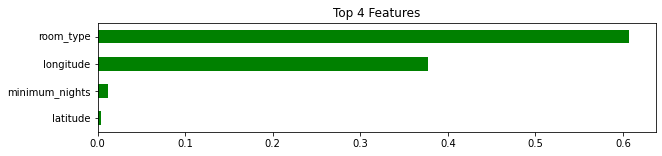

In [37]:
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

n = 4
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} Features')
importances.sort_values()[-n:].plot.barh(color='green');